In [33]:
import pandas as pd
from SIC2023_resolution import *

names=['entry_id', 'dep_date', 'status_code', 'method', 'title', 'keywords', 'other_keywords']
entry_df = pd.read_csv('/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/entry_info.csv', sep=';', names=names)

In [34]:
import pandas as pd
from SIC2023_resolution import *
import os

df = pd.read_csv('/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/puckering/piranoses_clean_family_and_protein_name_entry_name.csv')
df = df.iloc[:, 4:]
# Remover todos os números da coluna
df['Family'] = df['Family'].str.replace('\d+', '', regex=True)

df = df.drop_duplicates(subset='sugar_entry')

cazy_entries = df[['sugar_entry', 'Family']]
cazy_entries['sugar_entry'] = cazy_entries['sugar_entry'].str.upper()

family_names = {
    'AA': 'Auxiliary Activities',
    'GH': 'Glycoside Hydrolases',
    'CBM': 'Carbohydrate-Binding Modules',
    'GT': 'Glycosyltransferases',
    'CE': 'Carbohydrate Esterases',
    'PL': 'Polysaccharide Lyases'
}

cazy_entries['Family'] = cazy_entries['Family'].replace(family_names)

#Merge

entry_df = entry_df.merge(cazy_entries, how='left', left_on='entry_id', right_on='sugar_entry')
entry_df = entry_df.drop(columns=['sugar_entry'])

#Completa com classificação comum do PDB

entry_df['Family'] = entry_df['Family'].fillna(entry_df['keywords'])



In [35]:
entry_df['Family'] = entry_df['Family'].str.upper()

classif_df = entry_df[['entry_id', 'Family']]
classif_df.columns = ['entry_id', 'type']

In [36]:
mon_names = ['sugar','iupac_name', 'puck.phi_graus', 'puck.theta_graus', 'entry_id','entry_resolution', 'is_in_cazy']
mon_df = pd.read_csv('/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/puckering/all_monossacharide_df_without_missing.csv', header=None, names=mon_names)

mon_df['entry_id'] = mon_df['entry_id'].str.upper()

#Merge
mon_df = mon_df.merge(classif_df, how='left', left_on='entry_id', right_on='entry_id')
#mon_df = mon_df.drop(columns=['entry_id'])


In [37]:
#To_csv

mon_df.to_csv('/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/carbovault/all_monossacharide_df_without_missing.csv', header=None, sep=';')
entry_df.to_csv('/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/carbovault/entry_info.csv', header=None, sep=';')

In [6]:
#Read methods
import pandas as pd

method_df = pd.read_csv("/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/methods.txt", header=None, names = ['entry_filename', 'method'], sep=',')

em_sugars = method_df.loc[method_df['method'] == 'ELECTRON MICROSCOPY']['entry_filename'].values

Análise pro TCC dos parâmetros das entradas do PDB contendo açúcares

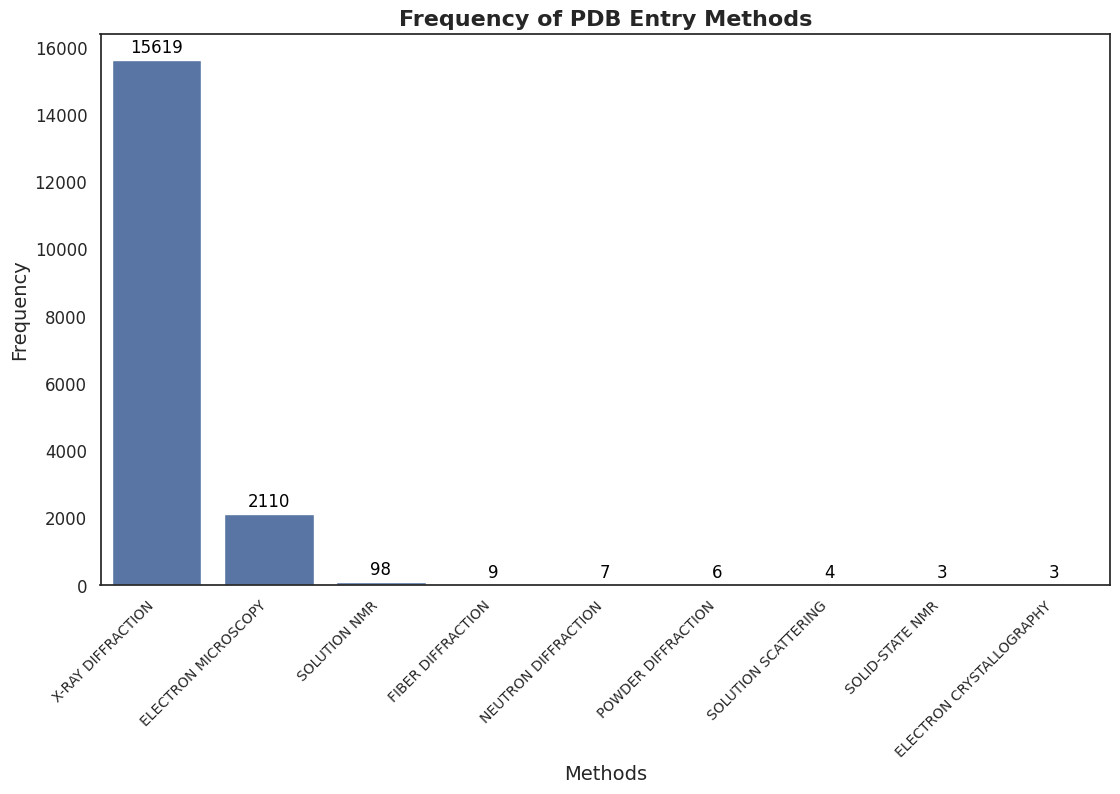

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Supondo que method_df seja seu DataFrame
# method_df['method'] contém os métodos que você quer mostrar no gráfico

# Contar a frequência de cada método
method_counts = method_df['method'].value_counts()

# Definir o estilo do gráfico (sem grid)
sns.set(style="white")  # Define o estilo sem a grid

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))  # Aumenta a altura do gráfico para dar mais espaço
ax = sns.barplot(x=method_counts.index, y=method_counts.values)

# Adicionar título e rótulos em inglês
ax.set_title('Frequency of PDB Entry Methods', fontsize=16, fontweight='bold')
ax.set_xlabel('Methods', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

# Melhorar a formatação das legendas (rotacionando as labels para melhor legibilidade)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=12)

# Adicionar valores nas barras para maior clareza
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                fontsize=12, color='black', 
                xytext=(0, 9), textcoords='offset points')

# Ajustar o layout para evitar corte e aumentar o espaço superior
plt.tight_layout(pad=3.0)  # Aumenta o espaço entre os elementos
plt.subplots_adjust(top=1)  # Ajusta a margem superior para dar mais espaço

# Exibir o gráfico
plt.show()


In [ ]:
#Tabela de resolução
import pandas as pd
res_df = pd.read_csv("/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/resolution_all.csv", header=None, names = ['entry_id', 'resolution'], sep=';')

entry_df = pd.read_csv('/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/carbo_entrys_nd.txt', names = ['entry_filename'])
entry_df['entry_filename'] = entry_df['entry_filename'].str.replace('.cif', '')
entry_df['entry_filename'] = entry_df['entry_filename'].str.upper()
entries = entry_df['entry_filename'].values

entrada_faltando = list(set(entries) - set(res_df['entry_id'].values))
#3JQ2
entry_3jq2 = pd.DataFrame([['3J2Q', 15]], columns=["entry_id", "resolution"])
res_df = pd.concat([res_df, entry_3jq2], ignore_index=True)

#To numeric
res_df['resolution'] = pd.to_numeric(res_df['resolution'], errors='coerce')

#Remove invalid
res_df = res_df.loc[res_df['resolution'] != -1]

#Valores
less_than_1 = res_df.loc[res_df['resolution'] <= 1]
less_than_1_5 = res_df.loc[(res_df['resolution'] > 1) & (res_df['resolution'] <= 1.5)]
less_than_2 = res_df.loc[(res_df['resolution'] > 1.5) & (res_df['resolution'] <= 2)]
less_than_2_5 = res_df.loc[(res_df['resolution'] > 2) & (res_df['resolution'] <= 2.5)]
less_than_3_5 = res_df.loc[(res_df['resolution'] > 2.5) & (res_df['resolution'] <= 3.5)]
less_than_5 = res_df.loc[(res_df['resolution'] > 3.5) & (res_df['resolution'] <= 5)]
greater_than_5 = res_df.loc[res_df['resolution'] > 5]



resolution_table = pd.DataFrame({
    "Range": ['R ≤ 1', '1.0 <R ≤ 1.5', '1.5 <R ≤ 2.0', '2.0 <R ≤ 2.5', '2.5 <R ≤ 3.5', '3.5 <R ≤ 5.0', 'R ≥ 5.0'],
    "Count": [less_than_1.shape[0], less_than_1_5.shape[0], less_than_2.shape[0], less_than_2_5.shape[0], less_than_3_5.shape[0], less_than_5.shape[0], greater_than_5.shape[0]]
})

resolution_table['Percent'] = (resolution_table['Count'] / resolution_table['Count'].sum()) * 100 

print(resolution_table['Percent'].sum())
print(resolution_table['Count'].sum())

100.0


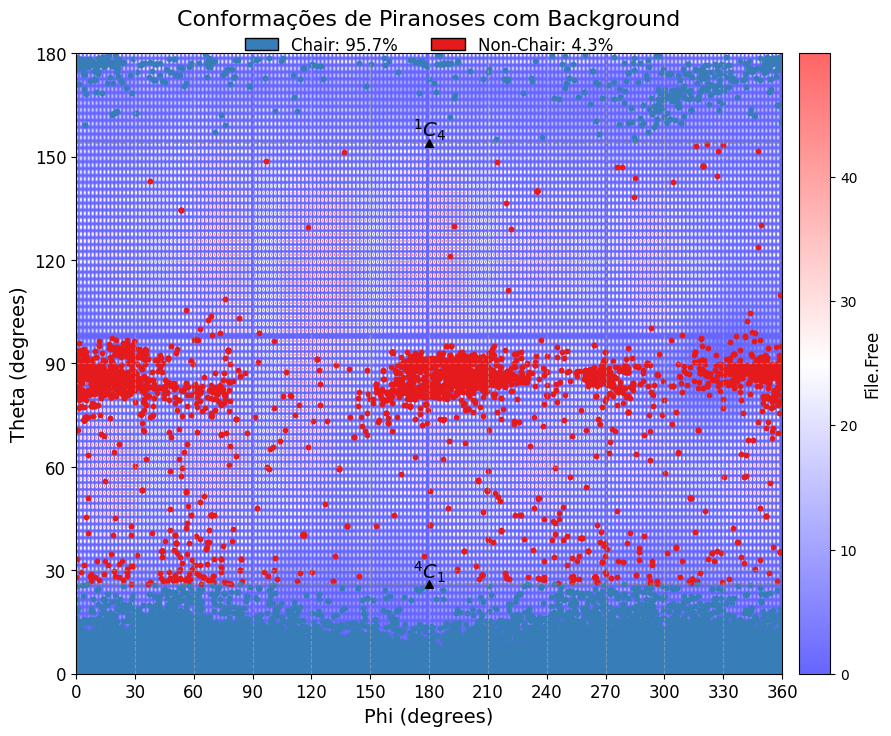

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np

# Verificar se manose_dat está carregado
try:
    manose_dat
except NameError:
    raise NameError("O DataFrame 'manose_dat' não foi definido. Por favor, carregue-o antes de executar o código.")

# Criar uma matriz para o background
phi_bins = np.linspace(0, 360, 361)  # Bins para phi (graus)
theta_bins = np.linspace(0, 180, 181)  # Bins para theta (graus)

# Criar uma grade bidimensional para armazenar valores de 'file.free'
heatmap = np.zeros((len(theta_bins) - 1, len(phi_bins) - 1))

# Agrupar os dados de 'manose_dat' em bins de phi e theta
for _, row in manose_dat.iterrows():
    phi_idx = np.digitize(row['puck.phi_graus'], phi_bins) - 1
    theta_idx = np.digitize(row['puck.theta_graus'], theta_bins) - 1
    if 0 <= phi_idx < len(phi_bins) - 1 and 0 <= theta_idx < len(theta_bins) - 1:
        heatmap[theta_idx, phi_idx] = row['file.free']  # Adicionar o valor correspondente

# Criar a figura e o eixo
fig, ax = plt.subplots(figsize=(10, 8))

# Adicionar o background ao gráfico
cmap = plt.cm.bwr  # Escolher um colormap
background = ax.imshow(
    heatmap, 
    extent=[0, 360, 0, 180], 
    origin='lower', 
    aspect='auto', 
    cmap=cmap, 
    alpha=0.6  # Transparência
)

# Adicionar a barra de cores
cbar = plt.colorbar(background, ax=ax, pad=0.02)
cbar.set_label('File.Free', fontsize=12)
cbar.ax.tick_params(labelsize=10)

# Coordenadas e labels
coordinates = [
    (180, 26, r"$^{4}C_{1}$"),
    (180, 154, r"$^{1}C_{4}$")
]

# Cores para os pontos
default_color = '#377eb8'  # Azul (Chair)
highlight_color = '#e41a1c'  # Vermelho (Non-Chair)

# Filtrar os dados do DataFrame
highlight_condition = (piranose_df['puck.theta_graus'] > 26) & (piranose_df['puck.theta_graus'] < 154)

# Pontos destacados (Non-Chair)
ax.scatter(
    piranose_df.loc[highlight_condition, 'puck.phi_graus'], 
    piranose_df.loc[highlight_condition, 'puck.theta_graus'], 
    color=highlight_color,  # Vermelho
    s=10,  # Tamanho dos pontos (aumentado para melhor visualização)
    label='Non-Chair'
)

# Pontos padrão (Chair)
ax.scatter(
    piranose_df.loc[~highlight_condition, 'puck.phi_graus'], 
    piranose_df.loc[~highlight_condition, 'puck.theta_graus'], 
    color=default_color,  # Azul
    s=10,  # Tamanho dos pontos
    label='Chair'
)

# Adicionar as coordenadas específicas com rótulos
for x, y, label in coordinates:
    ax.axhline(
        y=y, 
        color='gray', 
        linestyle='--', 
        linewidth=1.2, 
        alpha=0.7, 
        zorder=1
    )  # Linha horizontal
    ax.scatter(x, y, color='black', s=30, marker='^', zorder=10)  # Ponto marcado
    ax.text(
        x, y, 
        label,
        fontsize=14,  # Aumentar o tamanho da fonte
        ha='center',
        va='bottom',
        color='black',
        zorder=10
    )

# Configurações do gráfico
ax.set_xlim([0, 360])  # Limites do eixo x
ax.set_ylim([0, 180])  # Limites do eixo y
ax.set_xlabel('Phi (degrees)', fontsize=14)  # Rótulo do eixo x
ax.set_ylabel('Theta (degrees)', fontsize=14)  # Rótulo do eixo y
ax.set_title('Conformações de Piranoses com Background', fontsize=16, pad=20)  # Título com maior espaçamento

# Definir os valores dos eixos com intervalo de 30
ax.set_xticks(range(0, 361, 30))  # Eixo x de 0 a 360 com intervalo de 30
ax.set_yticks(range(0, 181, 30))  # Eixo y de 0 a 180 com intervalo de 30
ax.tick_params(axis='both', labelsize=12)  # Ajustar tamanho das labels dos eixos
ax.grid(True, linestyle='--', alpha=0.5)  # Adicionar grade para melhor visualização

# Cálculo das porcentagens
total_points = len(piranose_df)
chair_points = len(piranose_df.loc[~highlight_condition])
non_chair_points = len(piranose_df.loc[highlight_condition])

chair_percentage = (chair_points / total_points) * 100
non_chair_percentage = (non_chair_points / total_points) * 100

# Adicionar a legenda no topo central
legend_elements = [
    Patch(facecolor=default_color, edgecolor='black', label=f'Chair: {chair_percentage:.1f}%'),
    Patch(facecolor=highlight_color, edgecolor='black', label=f'Non-Chair: {non_chair_percentage:.1f}%')
]
ax.legend(
    handles=legend_elements,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.052),
    fontsize=12,
    frameon=False,
    ncol=2  # Organiza a legenda em duas colunas
)

plt.tight_layout(pad=3.0)  # Ajuste de padding para evitar sobreposição
plt.show()
